# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Knowing About the classes

In [4]:
#PATH ALLOCATION
data_dir=os.path.join('asl_alphabet_data')
classes=sorted(os.listdir(data_dir))
print(classes)
print(len(classes))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
29


# Loading and Preprocessing the data

In [14]:
# Load and preprocess data from subfolders
def load_data(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    for class_index, class_name in enumerate(class_names):
        class_path = os.path.join(folder, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224,224))
            images.append(image)
            labels.append(class_index)
    return images, labels

# Load and preprocess image data
images, labels = load_data('asl_alphabet_data')

# Splitting of the data

In [15]:
# Split data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Normalize pixel values to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Print shapes for verification
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (2320, 224, 224, 3)
Train labels shape: (2320,)
Test images shape: (580, 224, 224, 3)
Test labels shape: (580,)


# Visualization

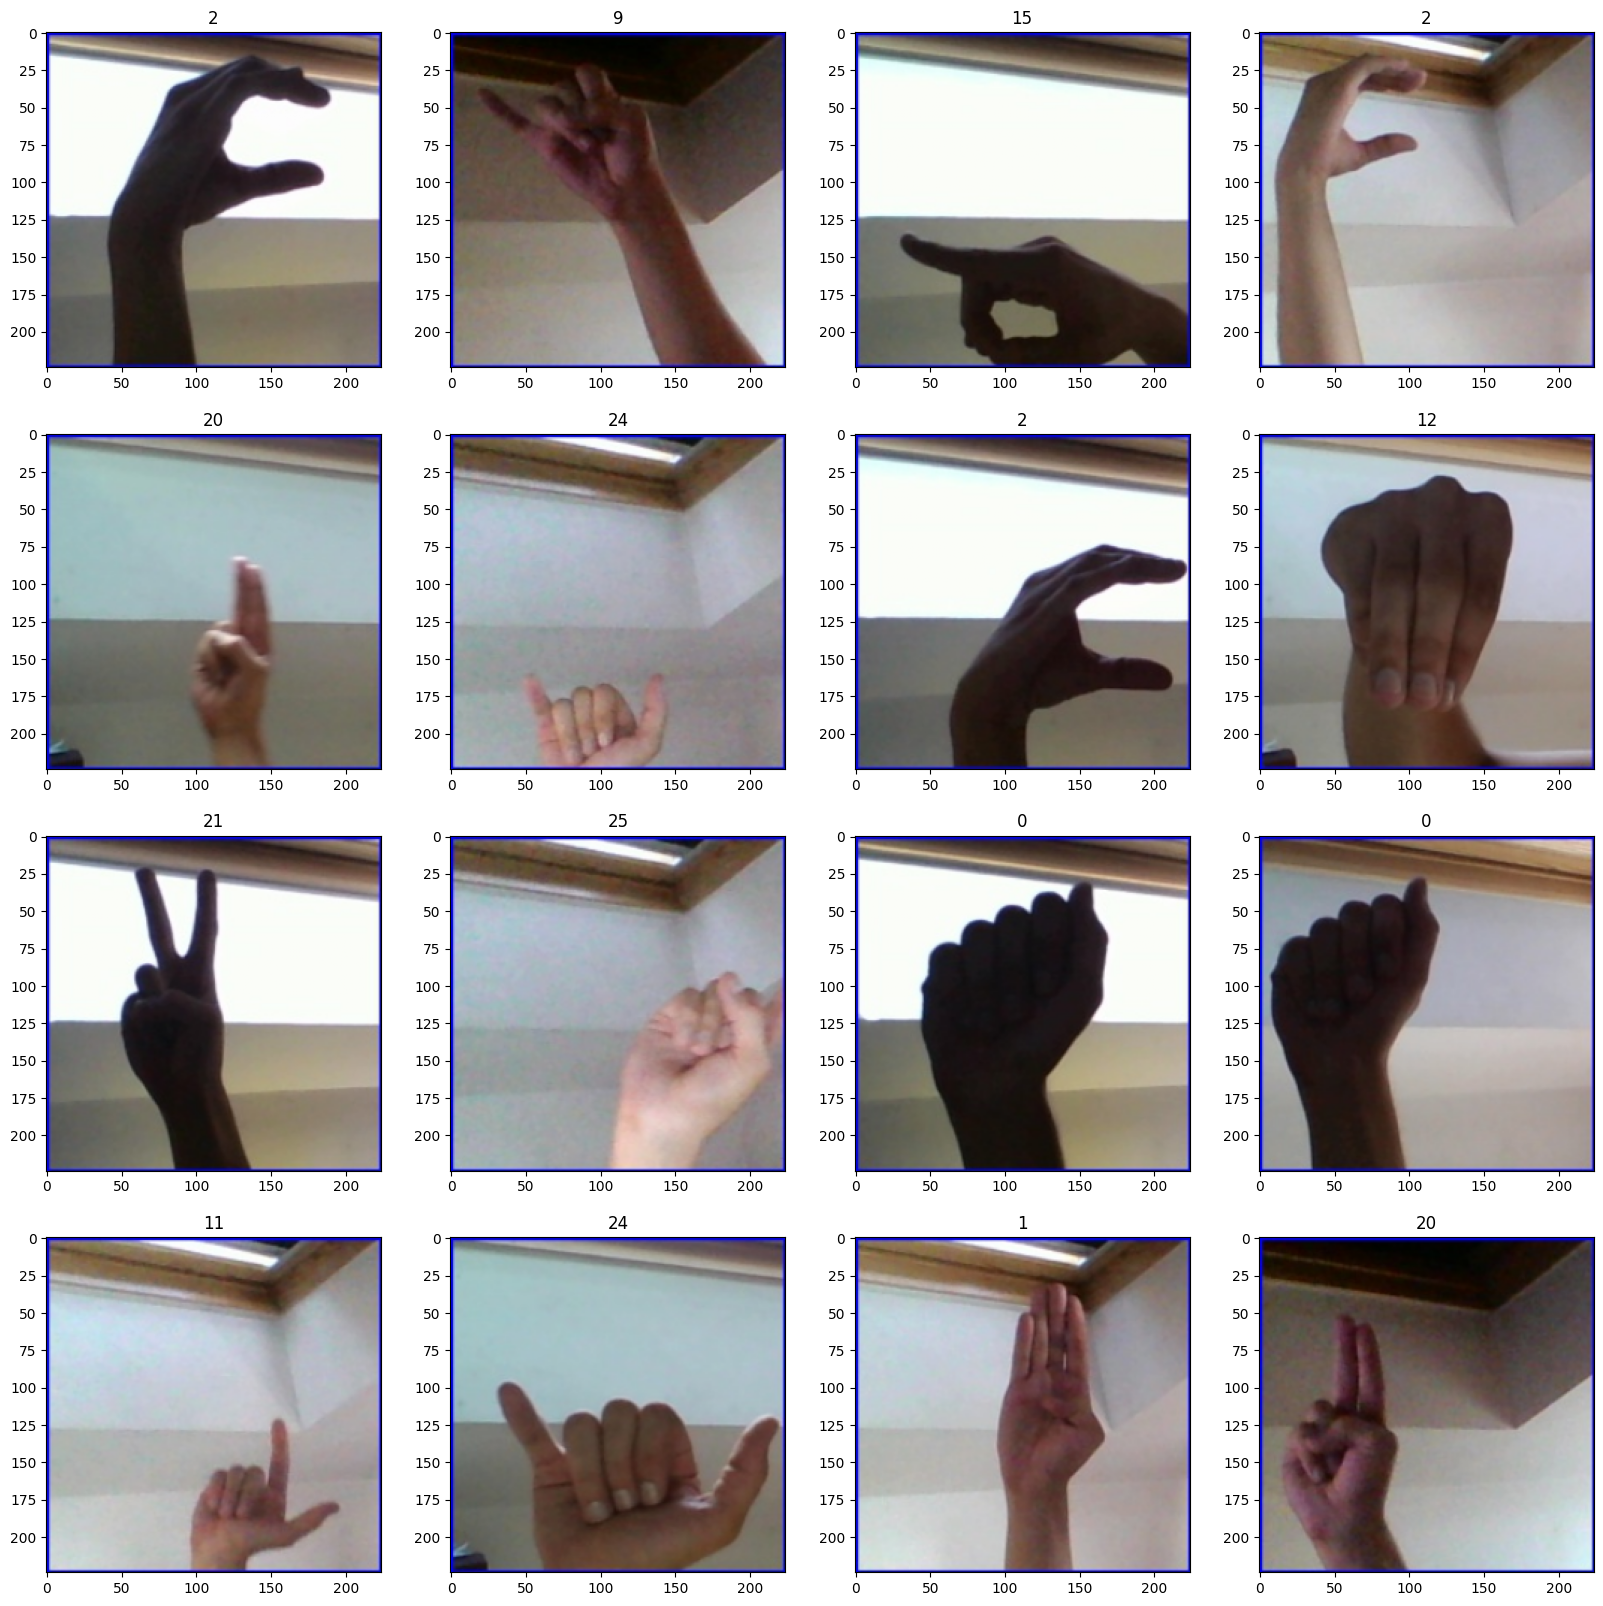

In [16]:
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(20,20))
ax=ax.flatten()
for i,j in enumerate(train_images[:16]):
    ax[i].imshow(j)    #already in minimal scaled range
    ax[i].title.set_text(train_labels[i])

# Building MobileNet

In [30]:
# MobileNet
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model

# Neural network architecture
pretrainedModel = MobileNet(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrainedModel.trainable = False

inputs = pretrainedModel.input

x = Dense(128, activation='relu')(pretrainedModel.output)
x = Dropout(0.5)(x)  # Adding dropout layer with 50% dropout rate
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout layer with 50% dropout rate

outputs = Dense(29, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile the model with regularization
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Training the Model

In [31]:
#TRAINING
tensor_call=tf.keras.callbacks.TensorBoard(log_dir='logs')
tensor_call
#using logs & call backs we can manage the learning phase at any instance

#fit the model
history = model.fit(train_images, train_labels, epochs=50, callbacks=[tensor_call])

Epoch 1/50
73/73 [==============================] - 43s 535ms/step - loss: 3.3482 - accuracy: 0.0668
Epoch 2/50
73/73 [==============================] - 40s 551ms/step - loss: 2.8563 - accuracy: 0.1871
Epoch 3/50
73/73 [==============================] - 40s 546ms/step - loss: 2.3665 - accuracy: 0.3039
Epoch 4/50
73/73 [==============================] - 40s 546ms/step - loss: 1.9272 - accuracy: 0.4099
Epoch 5/50
73/73 [==============================] - 39s 538ms/step - loss: 1.6815 - accuracy: 0.4716
Epoch 6/50
73/73 [==============================] - 42s 575ms/step - loss: 1.4188 - accuracy: 0.5491
Epoch 7/50
73/73 [==============================] - 43s 585ms/step - loss: 1.2793 - accuracy: 0.5733
Epoch 8/50
73/73 [==============================] - 39s 537ms/step - loss: 1.1311 - accuracy: 0.6237
Epoch 9/50
73/73 [==============================] - 40s 547ms/step - loss: 1.1379 - accuracy: 0.6159
Epoch 10/50
73/73 [==============================] - 40s 546ms/step - loss: 0.9650 - accura

# Perfomance Visualization

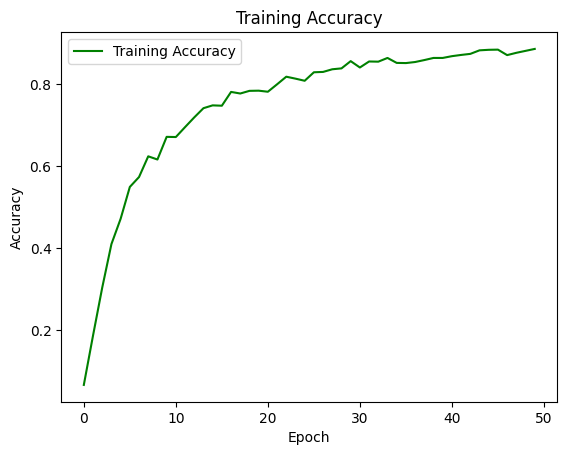

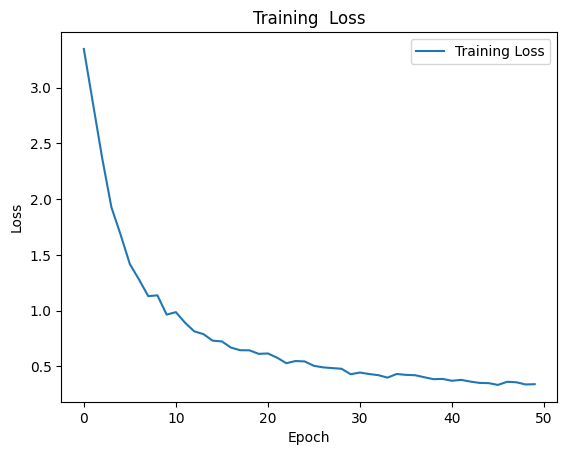

In [32]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy',color='green')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training  Loss')
plt.legend()
plt.show()


# Evaluating the model

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already trained your model and obtained predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy*100,"%")

# Calculate precision
precision = precision_score(test_labels, predicted_labels, average='weighted')
print("Precision:", precision*100, "%")

# Calculate recall
recall = recall_score(test_labels, predicted_labels, average='weighted')
print("Recall:", recall*100, "%")

# Calculate F1 score
f1 = f1_score(test_labels, predicted_labels, average='weighted')
print("F1 Score:", f1*100,"%")


19/19 [==============================] - 9s 443ms/step
Accuracy: 98.9655172413793 %
Precision: 98.9810733730879 %
Recall: 98.9655172413793 %
F1 Score: 98.96508593733152 %


# Visualizing the test data with predicted and actual labels

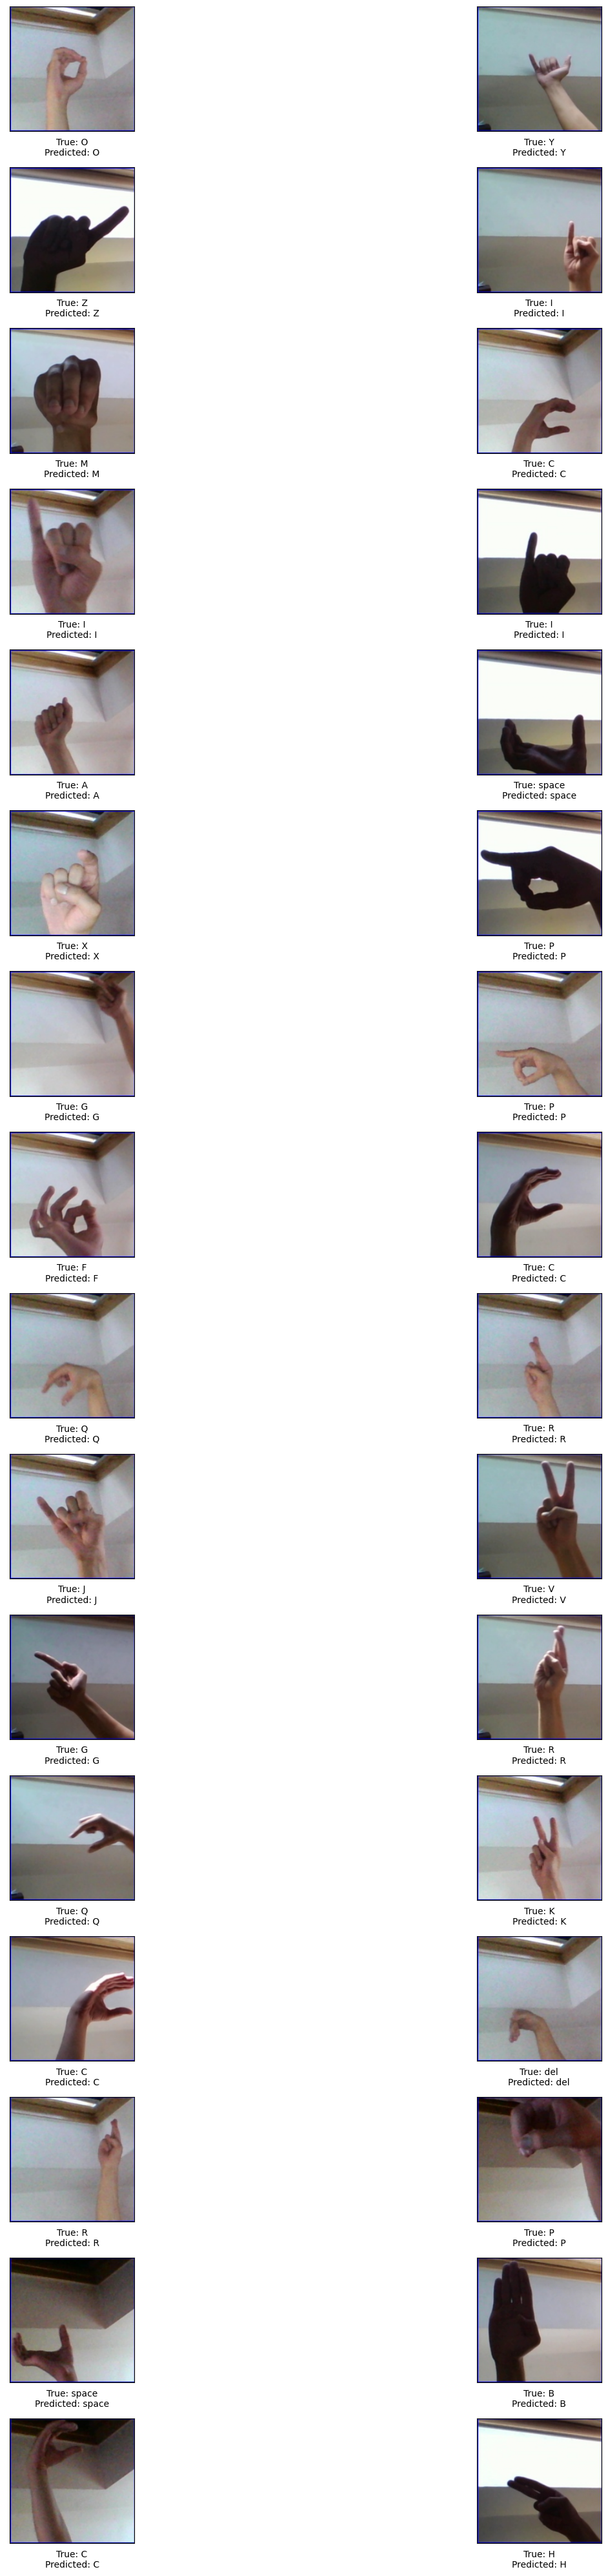

In [34]:
# Define figure size
plt.figure(figsize=(20, 40))  # Increase the height of the figure

# Plot test images along with original and predicted labels
for i in range(32):
    plt.subplot(16, 2, i + 1)  # Increase the number of rows to accommodate larger height
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(f"True: {classes[test_labels[i]]}\nPredicted: {classes[predicted_labels[i]]}")

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()


# Model Saving

In [35]:
# Save model
model.save('sign_language_MAIN_1.h5')